# Movie dataset analysis

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read in the data
df = pd.read_csv(r'C:\Users\20122\Desktop\projects-datasets\Movies\movies.csv')

In [51]:
# Show all rows
pd.set_option('display.max_rows', None)


In [93]:
#Look at data
#df.head()

In [8]:
# Missing data in each column by percentage
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [9]:
# Data Types of columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


# Data cleaning


In [94]:
# drop duplicates
#df.drop_duplicates()

In [49]:
# Count rows with any Null value 

count_any_nulls = df.isnull().any(axis=1).sum()
print("Rows with at least one null:", count_any_nulls)


Rows with at least one null: 2261


In [95]:
# Select release year as new colomn as production year is diffrent sometimes
df['release year'] = df['released'].astype(str).str.split(',', n=1).str[1].str.strip().str[:4]
#df  #// look at data

In [32]:
# Drop rows that has any null values in any column except budget and gross. Save that in a new table

df_clean = df.dropna(subset=['name', 'rating', 'genre', 'year', 'released', 'score', 'votes', 'director', 'writer', 'star', 'country', 'company', 'runtime' ])



# df3 is table with no null values at all

df3 = df.dropna()


In [33]:
# Change data types of votes and runtime to integrs in new tables

df_clean['votes'] = df_clean['votes'].astype('int64')
df_clean['runtime'] = df_clean['runtime'].astype('int64')


df3['votes'] = df3['votes'].astype('int64')
df3['runtime'] = df3['runtime'].astype('int64')
df3['budget'] = df3['budget'].astype('int64')
df3['gross'] = df3['gross'].astype('int64')

In [105]:
# All rows with Null values

df_nulls = df[df.isnull().any(axis=1)]
#df_nulls  #// look at data

#

In [48]:
# Reset index for df3
df3 = df3.reset_index(drop=True)
#df3

In [47]:
# Reset index for df_clean
df_clean = df_clean.reset_index(drop=True)
#df_clean

# Correlations and Analysis in Data

In [102]:

# Show top 5 movies by gross
df.nlargest(5, 'gross')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


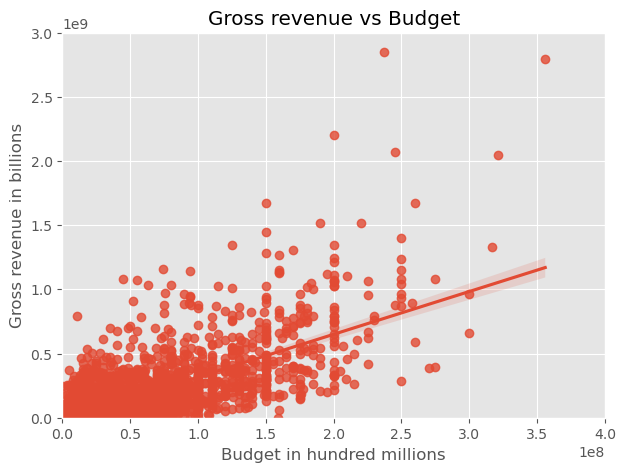

In [109]:
# Regression plot  of budget vs gross correlation

plt.figure(figsize=(7, 5))
sns.regplot(x="budget", y="gross", data=df)

plt.title("Gross revenue vs Budget")
plt.xlabel("Budget in hundred millions")
plt.ylabel("Gross revenue in billions")

# Control axis ranges
plt.xlim(0, 400000000)  # // 8 zeros
plt.ylim(0, 3000000000) # // 9 zeros
plt.show()

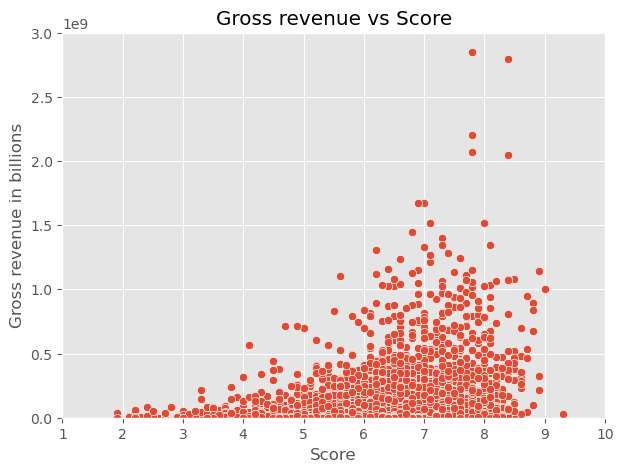

In [110]:

plt.figure(figsize=(7, 5))
sns.scatterplot(x="score", y="gross", data=df)

plt.title("Gross revenue vs Score")
plt.xlabel("Score")
plt.ylabel("Gross revenue in billions")

# Control axis ranges
plt.xlim(1, 10)  
plt.ylim(0, 3000000000) # // 9 zeros
plt.show()

In [119]:
# See correlations between columns 

df.corr(numeric_only=True, method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [125]:
# See correlations between columns ( in table of no null values)


df3.corr(numeric_only=True, method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055681,0.204904,0.326740,0.273512,0.074849
score,0.055681,1.000000,0.474594,0.071552,0.222504,0.414501
votes,0.204904,0.474594,1.000000,0.439077,0.614432,0.352263
budget,0.326740,0.071552,0.439077,1.000000,0.740028,0.318353
gross,0.273512,0.222504,0.614432,0.740028,1.000000,0.275641
runtime,0.074849,0.414501,0.352263,0.318353,0.275641,1.000000


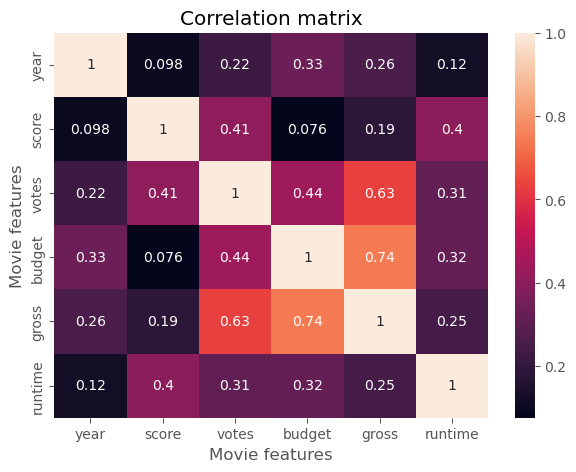

In [126]:
correlation_matrix = df.corr(numeric_only=True, method ='pearson')
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

# Top Contributors by Gross Revenue and Score

In [173]:
# Looking at the top 10 compaies by gross revenue

CompanyGrossSum = df_clean.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:10]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted



company
Warner Bros.             56329179122
Universal Pictures       52514188890
Columbia Pictures        43008941346
Paramount Pictures       40493607415
Twentieth Century Fox    40257053857
Walt Disney Pictures     36327887792
New Line Cinema          19867862616
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Touchstone Pictures      11795832638
Name: gross, dtype: int64

In [175]:
# Looking at the top 5 actors for movies with most gross revenue

StarGrossSum = df_clean.groupby('star')[["gross"]].sum()
StarGrossSumSorted = StarGrossSum.sort_values('gross', ascending = False)[:5]
StarGrossSumSorted = StarGrossSumSorted['gross'].astype('int64') 
StarGrossSumSorted


star
Robert Downey Jr.    11859526234
Tom Hanks             9952423823
Tom Cruise            9440309875
Daniel Radcliffe      7954064886
Will Smith            7947279234
Name: gross, dtype: int64

In [176]:
# Looking at the top 5 directors for movies with most gross revenue

DirGrossSum = df_clean.groupby('director')[["gross"]].sum()
DirGrossSumSorted = DirGrossSum.sort_values('gross', ascending = False)[:5]
DirGrossSumSorted = DirGrossSumSorted['gross'].astype('int64') 
DirGrossSumSorted


director
Steven Spielberg    9629049370
Anthony Russo       6844248984
Peter Jackson       6618045788
Michael Bay         6451692798
James Cameron       6248088578
Name: gross, dtype: int64

In [177]:
# Looking at the top 5 writers for movies with most gross revenue

WriterGrossSum = df_clean.groupby('writer')[["gross"]].sum()
WriterGrossSumSorted = WriterGrossSum.sort_values('gross', ascending = False)[:5]
WriterGrossSumSorted = WriterGrossSumSorted['gross'].astype('int64') 
WriterGrossSumSorted


writer
Christopher Markus    7587181621
James Cameron         6282146001
John Lasseter         4656539205
Chris Morgan          4360332296
Steve Kloves          4184681487
Name: gross, dtype: int64

In [178]:
# Looking at the top 10 compaies by movies' score

CompanyScoreSum = df_clean.groupby('company')[["score"]].sum()
CompanyScoreSumSorted = CompanyScoreSum.sort_values('score', ascending = False)[:10]
CompanyScoreSumSorted = CompanyScoreSumSorted['score'].astype('int64') 
CompanyScoreSumSorted

company
Universal Pictures           2410
Warner Bros.                 2141
Columbia Pictures            2100
Paramount Pictures           2027
Twentieth Century Fox        1499
New Line Cinema              1072
Touchstone Pictures           841
Walt Disney Pictures          796
Metro-Goldwyn-Mayer (MGM)     767
TriStar Pictures              586
Name: score, dtype: int64

In [180]:
# Looking at the top 5 actors for movies with best score

StarScoreSum = df_clean.groupby('star')[["score"]].sum()
StarScoreSumSorted = StarScoreSum.sort_values('score', ascending = False)[:5]
StarScoreSumSorted = StarScoreSumSorted['score'].astype('int64') 
StarScoreSumSorted


star
Tom Hanks            286
Robert De Niro       275
Nicolas Cage         265
Denzel Washington    255
Johnny Depp          228
Name: score, dtype: int64

#
#

In [164]:
# See unique values in rating column

df["rating"].unique()


array(['R', 'PG', 'G', <NA>, 'NC-17', 'Approved', 'TV-PG', 'PG-13', 'X',
       'TV-MA', 'TV-14'], dtype=object)

In [161]:
# See unique values in genre column

df["genre"].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [143]:
# Backup column for rating before changing 

#df['rating_backup'] = df['rating']


In [154]:
# Replace values of Not rated, Unrated, nan to Null

df['rating'] = df['rating'].replace({np.nan: pd.NA})
df['rating'] = df['rating'].replace(['Not Rated', 'Unrated'], pd.NA)

df_clean['rating'] = df_clean['rating'].replace({np.nan: pd.NA})
df_clean['rating'] = df_clean['rating'].replace(['Not Rated', 'Unrated'], pd.NA)

df3['rating'] = df3['rating'].replace({np.nan: pd.NA})
df3['rating'] = df3['rating'].replace(['Not Rated', 'Unrated'], pd.NA)

#
#

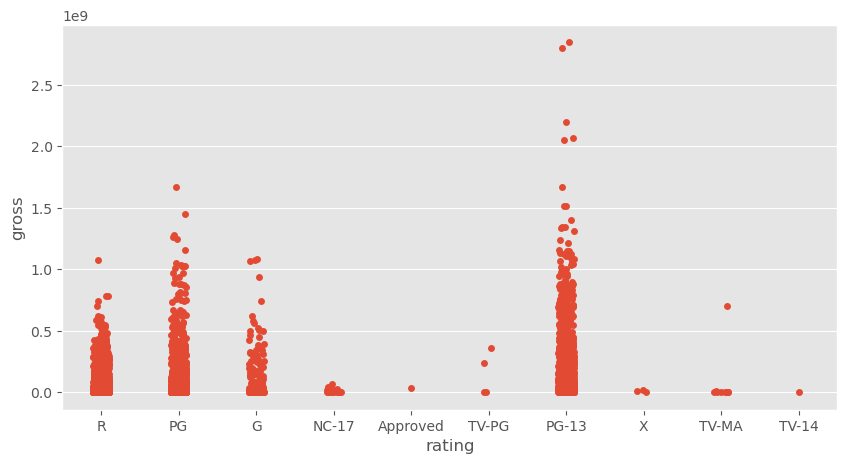

In [165]:
# Strip plot of Gross revenue vs rating

plt.figure(figsize=(10, 5))
sns.stripplot(x="rating", y="gross", data=df)
plt.show()


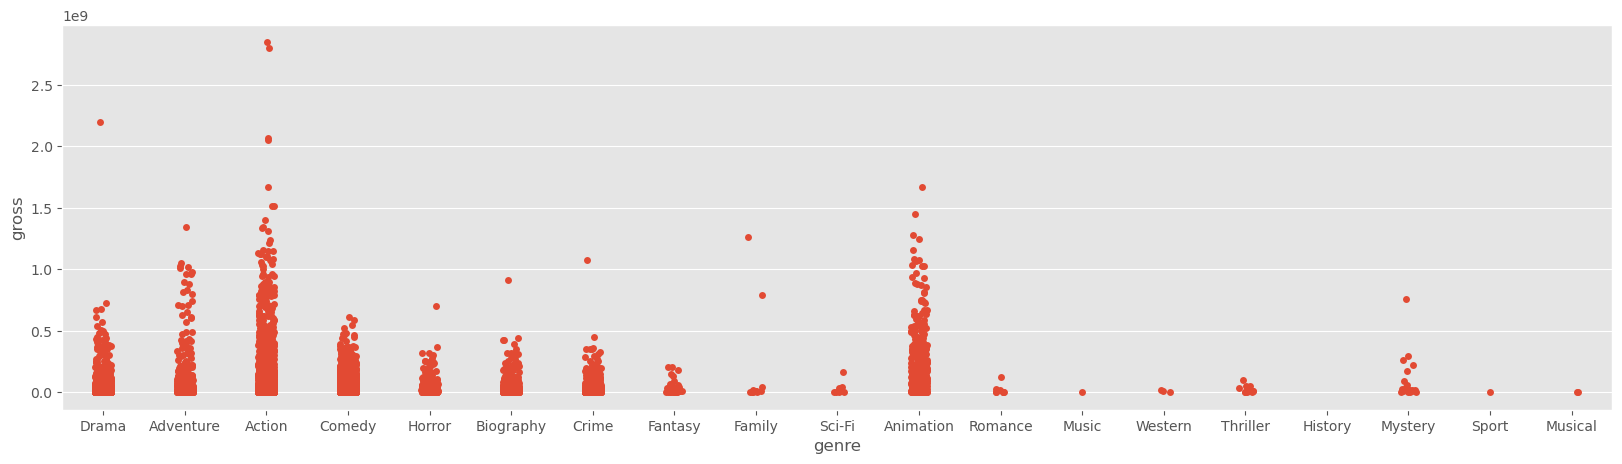

In [167]:
# Strip plot of Gross revenue vs genre

plt.figure(figsize=(20, 5))
sns.stripplot(x="genre", y="gross", data=df)
plt.show()

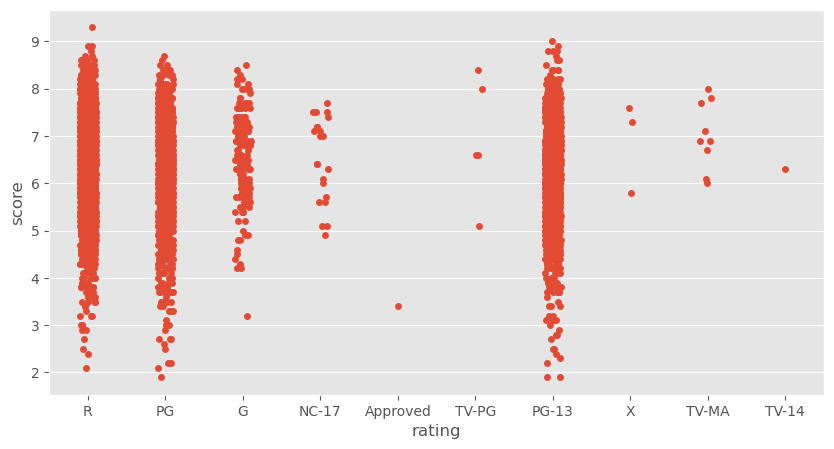

In [168]:
# Strip plot of score vs rating

plt.figure(figsize=(10, 5))
sns.stripplot(x="rating", y="score", data=df)
plt.show()


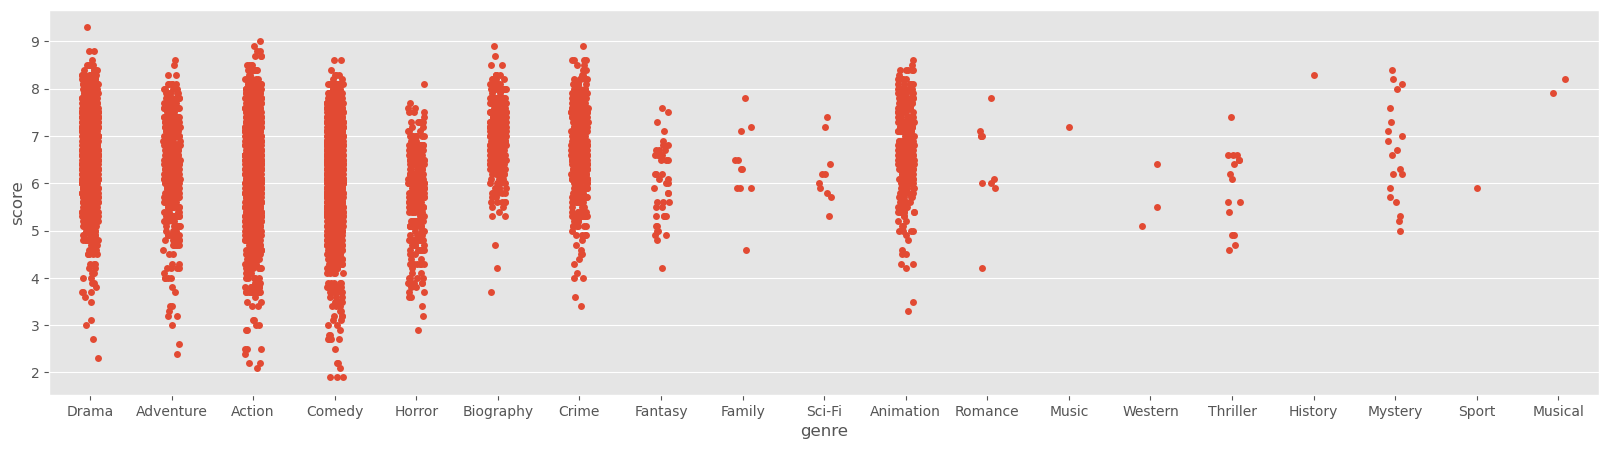

In [169]:
# Strip plot of Gross revenue vs genre

plt.figure(figsize=(20, 5))
sns.stripplot(x="genre", y="score", data=df)
plt.show()

#
#